In [ ]:
import tensorflow as tf;
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
from IPython.display import clear_output;
from six.moves import urllib;
from keras.datasets import fashion_mnist;


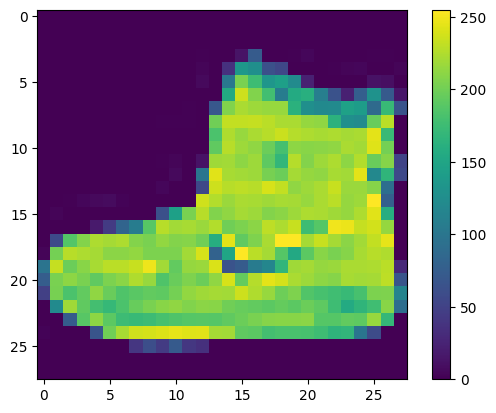

In [ ]:
(train__Images,train__labels),(test__Images,test__label)=fashion_mnist.load_data();
fashion_mnist
train__Images
class_names=[

]
train__Images.shape
len(test__label)
train__labels
len(train__labels.shape)
plt.figure();
plt.imshow(train__Images[0])
plt.colorbar();
plt.grid(False)
plt.show();

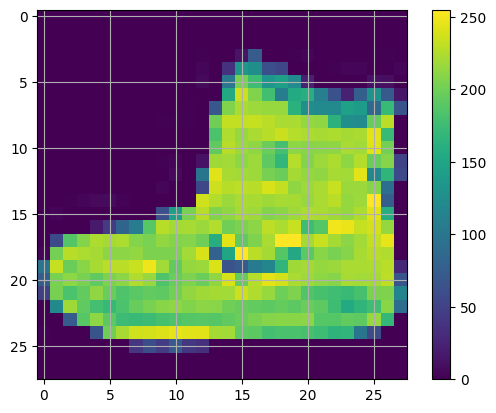

In [ ]:
##With grid
plt.figure();
plt.imshow(train__Images[0])
plt.colorbar();
plt.grid(True)
plt.show();

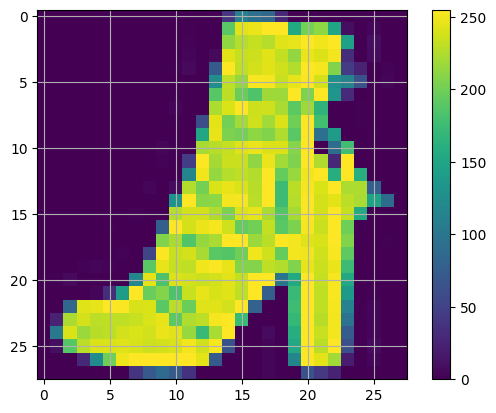

In [ ]:
plt.figure();
plt.imshow(train__Images[11])
plt.colorbar();
plt.grid(True)
plt.show()



In [ ]:
train__Images=train__Images/255.0
test__Images=test__Images/255.0

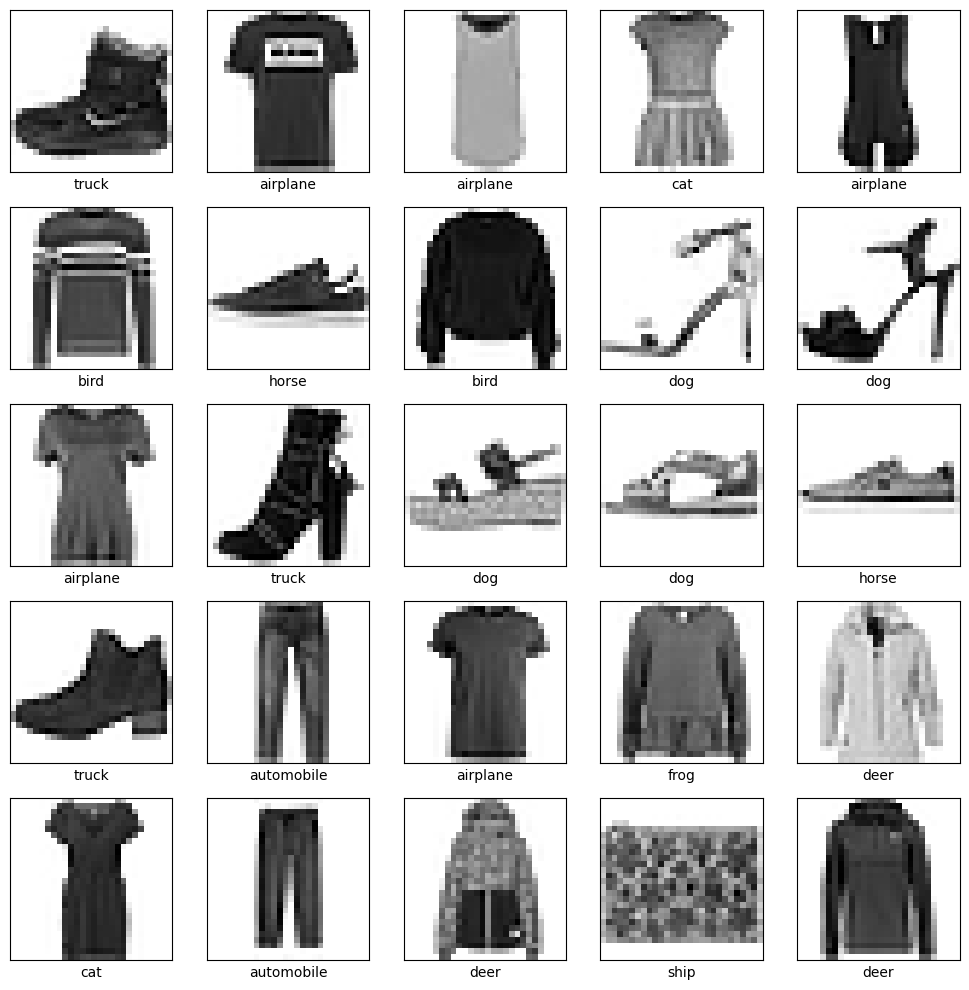

In [ ]:
import matplotlib.pyplot as plt;

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1);
  plt.xticks([]);
  plt.yticks([]);
  plt.grid(False);
  plt.imshow(train__Images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train__labels[i]])
plt.tight_layout()
plt.show();


In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])
model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<Sequential name=sequential_1, built=True>

In [ ]:
model_compiling=model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True,
    ),
    metrics=['accuracy']
)
model_compiling

In [ ]:
model.fit(train__Images,train__labels,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9151 - loss: 0.2302
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9179 - loss: 0.2208
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9188 - loss: 0.2172
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9227 - loss: 0.2073
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9225 - loss: 0.2057
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9243 - loss: 0.1989
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9306 - loss: 0.1849
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9318 - loss: 0.1830
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9301 - loss: 0.1831
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9336 - loss: 0.1749


In [ ]:
from re import VERBOSE
test__loss,test_accuracy=model.evaluate(
    test__Images,
    test__label,
    verbose=2
)
print(f"test accuracy calculation:{test_accuracy}")

313/313 - 1s - 4ms/step - accuracy: 0.8819 - loss: 0.3755
test accuracy calculation:0.8819000124931335


In [ ]:
##Probabilities model
probabilities__model=tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])
probabilities__model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 10)             │       101,770 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_1 (Softmax)             │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
indexIs=0
predictions=probabilities__model.predict(test__Images)
predictions[0]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([3.05563714e-14, 3.78041652e-12, 7.47292717e-14, 1.74464922e-11,
       3.85162246e-14, 5.37667183e-05, 3.50038168e-13, 1.95597322e-03,
       1.16288324e-11, 9.97990251e-01], dtype=float32)

In [ ]:
predictions[0].shape

(10,)

In [ ]:
i=10;
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt_im

In [ ]:

!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3beb908320f7c942b8b8b12267c93f0a1fe9aba025d6deaf30a61b6fdbc9bc8e
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport
import pandas as pd;
dftrain=pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dftest=pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
profile=ProfileReport(dftrain,title="Profile Report")
dftrain.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 47.36it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]